# Optimization of a cantilever beam

Consider the following cantilever beam with a rectangular cross section $b\times h$, length $L$, and end load $P$

<p style="text-align:center;">
    <img src="./beam_1.jpg" alt="beam 1" title="A cantilever beam" width="350px" align="center"/>
</p>

The maximum bending stress is given by
$$
\sigma_\text{max} = \dfrac{6PL}{bh^2}
$$
The weight is given by
$$
W = \rho bhL
$$
The deflection at the tip is given by
$$
\delta_\text{tip} = \dfrac{4PL^3}{Ebh^2}
$$

where $\rho$ is the density, $E$ is the elastic modulus.



We wish to minimize weight $W$ and maximize the maximum bending stress $\sigma_{max}$ simultaneously resulting in the following optimization problem

\begin{equation*}
    \begin{aligned}
        & \underset{\mathbf{x}}{\text{minimize}}
        & & \mathbf{f} = 
        \begin{bmatrix}
            f_1(\mathbf{{x};{\mathbf{p}}}) = W({h};{b},{L},{\rho}) \\
            f_2(\mathbf{{x};{\mathbf{p}}}) = \sigma_\text{max}({h};{b},{L},{P})
        \end{bmatrix}
    \end{aligned}
\end{equation*}

We can visualize the trade-off between these two objects below

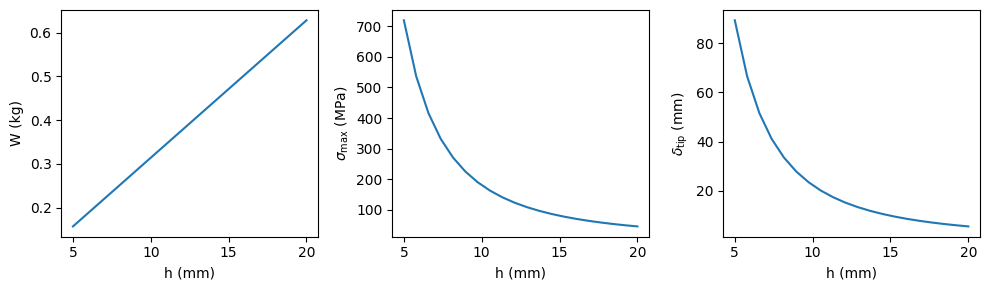

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
ρ = 7.85e-6 #kg/mm3
P = 300 # N
L = 200 # mm
b = 20 # mm
E = 215e3 # MPa

# independent parameter
h = np.linspace(5, 20, 20) # mm

# dependant parameters
W = ρ * b * h * L
σ_max = (6 * P * L) / (b * h**2)
δ_tip = (4 * P * L**3) / (E * b * h**2)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Weight plot
axs[0].plot(h, W, label="W")
axs[0].set_xlabel("h (mm)")
axs[0].set_ylabel("W (kg)")

# sigma plot
axs[1].plot(h, σ_max, label="σ_max")
axs[1].set_xlabel("h (mm)")
axs[1].set_ylabel("$\sigma_\mathrm{max}$ (MPa)")

plt.xlabel("$f_2 = W(\mathbf{x}^*)$ (kg)")

# deflection plot
axs[2].plot(h, δ_tip, label="δ_tip")
axs[2].set_xlabel("h (mm)")
axs[2].set_ylabel("$\delta_\mathrm{tip}$ (mm)")

plt.tight_layout()
plt.savefig("independant_vars.pdf")
plt.show()


## Solving the problem

We can solve such a problem using a method known as $\varepsilon$-constraint method. We convert one of the objective as a constraint and perform a parametric study on the *constraint bound parameter*

\begin{equation*}
	\begin{aligned}
		& \underset{\mathbf{x}}{\text{minimize}}
		& & f_1(\mathbf{{x};{\mathbf{p}}}) = W({h};{b},{L},{\rho}) \\
		& \text{subject to}
		& & f_2(\mathbf{{x};{\mathbf{p}}}) = \sigma_\text{max}({h};{b},{L},{P}) \le {{\sigma_y}}\\
	\end{aligned}
\end{equation*}

We know that as h $\downarrow$, W $\downarrow$ while $\sigma_\text{max}$ $\uparrow$. This means that the optimum thickness $h^*$ is 

$$
h^* = \sqrt{\dfrac{6PL}{\sigma_y b}}
$$

and
$$
\sigma_{\text{max}}(h^*) = \sigma_y\\
$$
$$
W(h^*) = \dfrac{\sqrt{6}\rho L^{\frac{3}{2}} b^{\frac{1}{2}}P^{\frac{1}{2}}}{\sigma_y}
$$

These two curves represent the Pareto front.\
**A design $\mathbf{x}^*$ is Pareto-optimal if an objective cannot be improved without deteriorating another**.\
We can vary $P$ to perform a *parametric study*

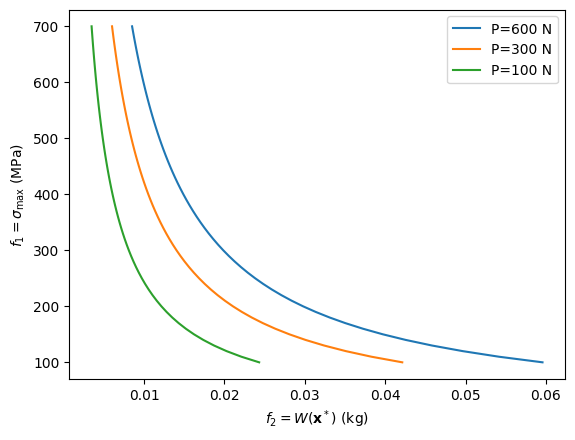

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Parameters
ρ = 7.85e-6 #kg/mm3
b = 20 # mm
L = 200 # mm

# constraint bound parameter
σ_y = np.arange(100, 710, 10)

# Pareto front
P_1 = 600
σ_max_opt_1 = σ_y
W_opt_1 = sqrt(6)*ρ*sqrt(b)*sqrt(P_1)*pow(L,3/2) / σ_y

P_2 = 300
σ_max_opt_2 = σ_y
W_opt_2 = sqrt(6)*ρ*sqrt(b)*sqrt(P_2)*pow(L,3/2) / σ_y

P_3 = 100
σ_max_opt_3 = σ_y
W_opt_3 = sqrt(6)*ρ*sqrt(b)*sqrt(P_3)*pow(L,3/2) / σ_y

# Pareto plot
plt.plot(W_opt_1, σ_max_opt_1, label=f"P={P_1} N")
plt.plot(W_opt_2, σ_max_opt_2, label=f"P={P_2} N")
plt.plot(W_opt_3, σ_max_opt_3, label=f"P={P_3} N")
plt.ylabel("$f_1 = \sigma_\mathrm{max}}(\mathbf{x}^*)$ (MPa)")
plt.xlabel("$f_2 = W(\mathbf{x}^*)$ (kg)")

plt.legend()
plt.savefig("Pareto_front.pdf")
plt.show()

## 2 design variables (2D case)

Let us consider the case where we wish to vary both $b$ and $h$ simultaneously, i.e., they are both independent parameters. Notice that $b$ is no longer a parameter

\begin{equation*}
	\begin{aligned}
		& \underset{\mathbf{x}}{\text{minimize}}
		& & f_1(\mathbf{{x};{\mathbf{p}}}) = W({h},{b};{L},{\rho}) \\
		& \text{subject to}
		& & f_2(\mathbf{{x};{\mathbf{p}}}) = \sigma_\text{max}({h},{b};{L},{P}) \le {{\sigma_y}}\\
	\end{aligned}
\end{equation*}

The solution to this problem is:

$$
    h^*(\sigma_y) = \dfrac{\sigma_y^3}{6 L^3 P \rho^2} \left(\dfrac{18 L^5 P^2 \rho^3}{\sigma_y^5}\right)^{2/3}\\
    b^*(\sigma_y) = \dfrac{\sigma_y^3}{3 L^3 P \rho^2} \left(\dfrac{18 L^5 P^2 \rho^3}{\sigma_y^5}\right)^{2/3}\\
$$

Do not worry about how I obtained this solution (for now).\
We can obtain a Pareto front for this problem by finding all the optimizers in the range of $\sigma_y$


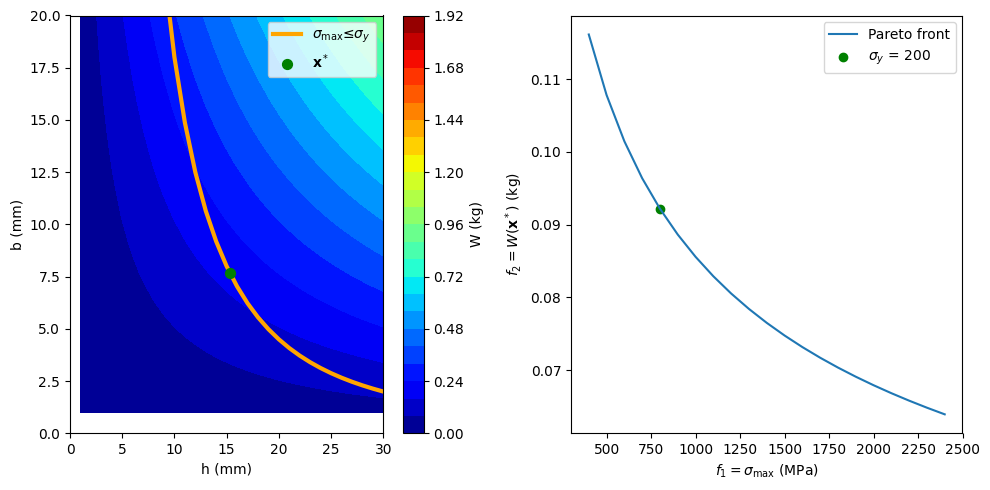

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import fmin

# Parameters
ρ = 7.85e-6 #kg/mm3
P = 300 # N
L = 200 # mm
σ_y = 200 # MPa

# independent parameters
h_2D = np.linspace(1,30,30) # mm
b_2D = np.linspace(1,40,30) # mm

# Meshgrid for contour plot
H_2D, B_2D = np.meshgrid(h_2D, b_2D)

# dependent variables
W = lambda b,h : ρ*b*h*L
σ_max = lambda b,h : (6*P*L) / (b*h**2)

# constraint function
b_cstr = lambda h : (6*P*L) / (σ_y*h**2)

# optimal variables
b_opt = lambda σ_y : (σ_y**3*((18*L**5*P**2*ρ**3)/σ_y**5)**(2/3))/(6*L**3*P*ρ**2)
h_opt = lambda σ_y : (σ_y**3*((18*L**5*P**2*ρ**3)/σ_y**5)**(2/3))/(3*L**3*P*ρ**2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Weight plot
contour = ax1.contourf(H_2D, B_2D, W(H_2D,B_2D), levels=30, cmap='jet')
fig.colorbar(contour, ax=ax1, label="W (kg)")
ax1.plot(h_2D, b_cstr(h_2D), lw=3, label="$\sigma_\mathrm{max} ≤ \sigma_y$",color="orange")
ax1.scatter(h_opt(σ_y), b_opt(σ_y), s=50, label="$\mathbf{x}^*$",color="g",zorder=2)
ax1.set_xlim(0, 30)
ax1.set_ylim(0, 20)
ax1.set_xlabel("h (mm)")
ax1.set_ylabel("b (mm)")

# Pareto plot
σ_y_pareto = np.arange(100, 625, 25)
ax2.plot(σ_max(b_opt(σ_y_pareto),b_opt(σ_y_pareto)), W(b_opt(σ_y_pareto),b_opt(σ_y)), label="Pareto front")
ax2.scatter(σ_max(b_opt(σ_y),b_opt(σ_y)), W(b_opt(σ_y),b_opt(σ_y)), label="$\sigma_y$ = " + str(σ_y),color="g")
ax2.set_xlabel("$f_1 = σ_\mathrm{max}}(\mathbf{x}^*)$ (MPa)")
ax2.set_ylabel("$f_2 = W(\mathbf{x}^*)$ (kg)")

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()